This script will take the average of the SASA values per atom per trajectory, find the surface exposed residues, and save them into a numpy file. Then, it will save the non-surface residues into a numpy file. The non-surface residues are any residues that don't show up in the surface exposed residue list. 

In [1]:
pwd

'/Users/shahlosolieva/Desktop/BGA_manuscript/solvent_accessible_surface_area/testing_other_percentile_values'

In [2]:
path_to_external_drive = "../../../../../../Volumes/Passport_for_Mac/files_from_owlsnest_May16_2022/p16925/curating_dataset/SASA_calculations_May15_2022/"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

### Calculate the average SASA per atom 

The percentile_value serves as the cutoff for defining surface vs nonsurface residues

In [4]:
percentile_value = 60

Define the paths for the SASA data:

In [5]:
lists1M=["SASA_data_files/SASA_1M_run5_unbound.npy",
         "SASA_data_files/SASA_1M_run6_unbound.npy",
         "SASA_data_files/SASA_1M_run7_unbound.npy",
         "SASA_data_files/SASA_1M_run26_unbound.npy",
         "SASA_data_files/SASA_1M_run27_unbound.npy"]
lists2M=["SASA_data_files/SASA_2M_run5_unbound.npy",
         "SASA_data_files/SASA_2M_run6_unbound.npy",
         "SASA_data_files/SASA_2M_run7_unbound.npy",
         "SASA_data_files/SASA_2M_run38_unbound.npy",
         "SASA_data_files/SASA_2M_run39_unbound.npy"]
lists3M=["SASA_data_files/SASA_3M_run13_unbound.npy",
         "SASA_data_files/SASA_3M_run14_unbound.npy",
         "SASA_data_files/SASA_3M_run15_unbound.npy",
         "SASA_data_files/SASA_3M_run30_unbound.npy",
         "SASA_data_files/SASA_3M_run31_unbound.npy"]
lists4M=["SASA_data_files/SASA_4M_run21_unbound.npy",
         "SASA_data_files/SASA_4M_run22_unbound.npy",
         "SASA_data_files/SASA_4M_run23_unbound.npy",
         "SASA_data_files/SASA_4M_run34_unbound.npy",
         "SASA_data_files/SASA_4M_run35_unbound.npy"]
lists = lists1M+lists2M+lists3M+lists4M

Calculate the average SASA per atom 

In [6]:
list_of_averages_atom = []
for i in range(len(lists)):
    datafile2 = np.load(path_to_external_drive+lists[i], allow_pickle=True)
    avg = []
    for j in range(len(datafile2)):
        avg.append(np.average(datafile2[j], axis=0))
    avg_2 = np.average(avg,axis=0)
    list_of_averages_atom.append(avg_2)

60 percentile has a SASA value of 0.010115839354693885


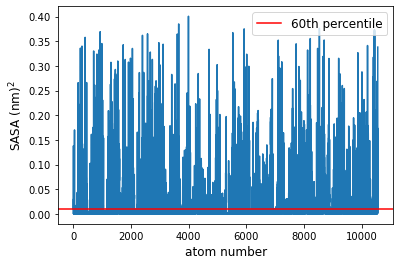

In [7]:
# example plot of the SASA value per atom, this is the system with 1M and 10C
plt.plot(list_of_averages_atom[0])
plt.ylabel("SASA $\mathregular{(nm)^2}$",fontsize=12)
plt.xlabel("atom number",fontsize=12)
plt.axhline(np.percentile(list_of_averages_atom[0], percentile_value), color="red", label="%dth percentile"%percentile_value)
plt.legend(fontsize=12)
print("%d percentile has a SASA value of"%percentile_value, np.percentile(list_of_averages_atom[0], percentile_value))

### Find the atoms that have a SASA value equal to or greater than a certain value. This certain value is defined here as being the nth percentile of the average SASA per atom values, where n = percentile_value

Here are the cutoff values for each molarity and temperature: 

In [8]:
print("the %dth percentile of the SASA data is:"%percentile_value)
for i in range(len(list_of_averages_atom)):
    print(lists[i], np.percentile(list_of_averages_atom[i], percentile_value))

the 60th percentile of the SASA data is:
SASA_data_files/SASA_1M_run5_unbound.npy 0.010115839354693885
SASA_data_files/SASA_1M_run6_unbound.npy 0.010504135116934774
SASA_data_files/SASA_1M_run7_unbound.npy 0.010616374574601649
SASA_data_files/SASA_1M_run26_unbound.npy 0.01087907273322343
SASA_data_files/SASA_1M_run27_unbound.npy 0.010880761966109275
SASA_data_files/SASA_2M_run5_unbound.npy 0.012407956272363662
SASA_data_files/SASA_2M_run6_unbound.npy 0.01241318508982658
SASA_data_files/SASA_2M_run7_unbound.npy 0.012314688228070726
SASA_data_files/SASA_2M_run38_unbound.npy 0.012022504583001137
SASA_data_files/SASA_2M_run39_unbound.npy 0.011874441616237161
SASA_data_files/SASA_3M_run13_unbound.npy 0.012022129446268078
SASA_data_files/SASA_3M_run14_unbound.npy 0.01194879878312349
SASA_data_files/SASA_3M_run15_unbound.npy 0.01204592045396566
SASA_data_files/SASA_3M_run30_unbound.npy 0.011938760429620728
SASA_data_files/SASA_3M_run31_unbound.npy 0.011711551994085311
SASA_data_files/SASA_4M_

For each set, find the atoms that have a SASA value >= to the respective cutoff and save them to the list atom_lists

In [9]:
atoms_lists = []
for i in range(len(list_of_averages_atom)):
    atoms_list = []
    for j in range(len(list_of_averages_atom[i])):
        if list_of_averages_atom[i][j] >= np.percentile(list_of_averages_atom[i], percentile_value):
            atoms_list.append(j)
    atoms_lists.append(atoms_list)

For each set, this is how many atoms were found to have a SASA value >= the cutoff value:

In [10]:
print("number of atoms for each set that have a SASA value >= the cutoff value:")
for i in range(len(atoms_lists)):
    print(lists[i], len(atoms_lists[i]))

number of atoms for each set that have a SASA value >= the cutoff value:
SASA_data_files/SASA_1M_run5_unbound.npy 4224
SASA_data_files/SASA_1M_run6_unbound.npy 4224
SASA_data_files/SASA_1M_run7_unbound.npy 4224
SASA_data_files/SASA_1M_run26_unbound.npy 4224
SASA_data_files/SASA_1M_run27_unbound.npy 4224
SASA_data_files/SASA_2M_run5_unbound.npy 4224
SASA_data_files/SASA_2M_run6_unbound.npy 4224
SASA_data_files/SASA_2M_run7_unbound.npy 4224
SASA_data_files/SASA_2M_run38_unbound.npy 4224
SASA_data_files/SASA_2M_run39_unbound.npy 4224
SASA_data_files/SASA_3M_run13_unbound.npy 4224
SASA_data_files/SASA_3M_run14_unbound.npy 4224
SASA_data_files/SASA_3M_run15_unbound.npy 4224
SASA_data_files/SASA_3M_run30_unbound.npy 4224
SASA_data_files/SASA_3M_run31_unbound.npy 4224
SASA_data_files/SASA_4M_run21_unbound.npy 4224
SASA_data_files/SASA_4M_run22_unbound.npy 4224
SASA_data_files/SASA_4M_run23_unbound.npy 4224
SASA_data_files/SASA_4M_run34_unbound.npy 4224
SASA_data_files/SASA_4M_run35_unbound.np

### Find which residues these atoms belong to

Import a structure file from any of the sets 

In [12]:
top = md.load("../../example_files/p16925-r27-c0.gro")

Select all of the atoms in the protein:

In [13]:
atom_indices = top.topology.select("residue 1 to 700") # the protein has 700 residues

Find the residues that the atoms belong to:

In [14]:
res_lists_ = []
for i in range(len(atoms_lists)):
    res_list = []
    for j in range(len(atoms_lists[i])):
        res_list.append(str(top.topology.atom(atoms_lists[i][j]).residue)[3:])
    res_lists_.append(res_list)
    
res_lists = []
for i in range(len(res_lists_)):
    res_lists_int = []
    for j in range(len(res_lists_[i])):
        res_lists_int.append(int(res_lists_[i][j]))
    res_lists.append(np.unique(res_lists_int))

print("number of surface residues for each set: ")
for i in range(len(res_lists)):
    print(lists[i],len(res_lists[i]))

np.save("surface_nonsurface_residues/surface_residues_%dth_percentile.npy"%percentile_value, res_lists)

number of surface residues for each set: 
SASA_data_files/SASA_1M_run5_unbound.npy 585
SASA_data_files/SASA_1M_run6_unbound.npy 580
SASA_data_files/SASA_1M_run7_unbound.npy 578
SASA_data_files/SASA_1M_run26_unbound.npy 581
SASA_data_files/SASA_1M_run27_unbound.npy 579
SASA_data_files/SASA_2M_run5_unbound.npy 595
SASA_data_files/SASA_2M_run6_unbound.npy 596
SASA_data_files/SASA_2M_run7_unbound.npy 595
SASA_data_files/SASA_2M_run38_unbound.npy 596
SASA_data_files/SASA_2M_run39_unbound.npy 596
SASA_data_files/SASA_3M_run13_unbound.npy 600
SASA_data_files/SASA_3M_run14_unbound.npy 600
SASA_data_files/SASA_3M_run15_unbound.npy 594
SASA_data_files/SASA_3M_run30_unbound.npy 591
SASA_data_files/SASA_3M_run31_unbound.npy 590
SASA_data_files/SASA_4M_run21_unbound.npy 589
SASA_data_files/SASA_4M_run22_unbound.npy 592
SASA_data_files/SASA_4M_run23_unbound.npy 587
SASA_data_files/SASA_4M_run34_unbound.npy 586
SASA_data_files/SASA_4M_run35_unbound.npy 580


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Print the surface residues for the first set as an example: 

In [15]:
print(list(res_lists[0]))

[1, 2, 3, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 28, 29, 30, 31, 36, 37, 38, 40, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 58, 59, 60, 62, 63, 64, 65, 66, 67, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 118, 119, 122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 211, 212, 213, 214, 215, 217, 218, 220, 221, 222, 224, 225, 226, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 253, 254, 256, 257, 258, 259, 260, 261, 262, 265, 266, 267, 

### Find which residues are not surface exposed

If a residue is not in the surface residues list, then it will be counted as a nonsurface residue

In [16]:
res_lists_nonsurface = []
for j in range(len(res_lists)):
    res_b = []
    for i in range(1,701):
        if i not in res_lists[j]:
            res_b.append(i)
    res_lists_nonsurface.append(res_b)
print("number of non-surface residues for each set: ")
for i in range(len(res_lists_nonsurface)):
    print(lists[i], len(res_lists_nonsurface[i]))
np.save("surface_nonsurface_residues/nonsurface_residues_%dth_percentile.npy"%percentile_value, res_lists_nonsurface)

number of non-surface residues for each set: 
SASA_data_files/SASA_1M_run5_unbound.npy 115
SASA_data_files/SASA_1M_run6_unbound.npy 120
SASA_data_files/SASA_1M_run7_unbound.npy 122
SASA_data_files/SASA_1M_run26_unbound.npy 119
SASA_data_files/SASA_1M_run27_unbound.npy 121
SASA_data_files/SASA_2M_run5_unbound.npy 105
SASA_data_files/SASA_2M_run6_unbound.npy 104
SASA_data_files/SASA_2M_run7_unbound.npy 105
SASA_data_files/SASA_2M_run38_unbound.npy 104
SASA_data_files/SASA_2M_run39_unbound.npy 104
SASA_data_files/SASA_3M_run13_unbound.npy 100
SASA_data_files/SASA_3M_run14_unbound.npy 100
SASA_data_files/SASA_3M_run15_unbound.npy 106
SASA_data_files/SASA_3M_run30_unbound.npy 109
SASA_data_files/SASA_3M_run31_unbound.npy 110
SASA_data_files/SASA_4M_run21_unbound.npy 111
SASA_data_files/SASA_4M_run22_unbound.npy 108
SASA_data_files/SASA_4M_run23_unbound.npy 113
SASA_data_files/SASA_4M_run34_unbound.npy 114
SASA_data_files/SASA_4M_run35_unbound.npy 120


Print the nonsurface residues for the first set as an example: 

In [17]:
print(list(res_lists_nonsurface[0]))

[4, 5, 6, 7, 9, 21, 24, 27, 32, 33, 34, 35, 39, 42, 43, 54, 57, 61, 68, 69, 70, 71, 72, 73, 74, 81, 88, 113, 117, 120, 121, 124, 136, 138, 139, 140, 143, 160, 164, 174, 209, 210, 216, 219, 223, 227, 239, 240, 252, 255, 263, 264, 268, 269, 272, 293, 294, 308, 310, 311, 314, 318, 331, 332, 336, 339, 346, 347, 348, 349, 352, 364, 365, 366, 380, 383, 400, 401, 402, 403, 404, 408, 409, 426, 427, 430, 431, 434, 455, 457, 458, 459, 460, 483, 485, 486, 488, 489, 512, 552, 553, 577, 578, 588, 590, 592, 593, 599, 600, 603, 604, 607, 608, 623, 686]


## Graph the number of surface and nonsurface residues per condition when using this percentile value:

In [18]:
res_lists_nonsurface = res_lists_nonsurface
res_lists_surface    = res_lists

In [19]:
# calculate the number of residues in each list 
number_of_surface_res = []
number_of_nonsurface_res = []
for i in range(len(res_lists_surface)):
    number_of_surface_res.append(len(res_lists_surface[i]))
    number_of_nonsurface_res.append(len(res_lists_nonsurface[i]))

In [20]:
# split the lists into their respective conditions to make graphing easier
number_of_surface_res_1M    = number_of_surface_res[0:5]
number_of_nonsurface_res_1M = number_of_nonsurface_res[0:5]

number_of_surface_res_2M    = number_of_surface_res[5:10]
number_of_nonsurface_res_2M = number_of_nonsurface_res[5:10]

number_of_surface_res_3M    = number_of_surface_res[10:15]
number_of_nonsurface_res_3M = number_of_nonsurface_res[10:15]

number_of_surface_res_4M    = number_of_surface_res[15:20]
number_of_nonsurface_res_4M = number_of_nonsurface_res[15:20]

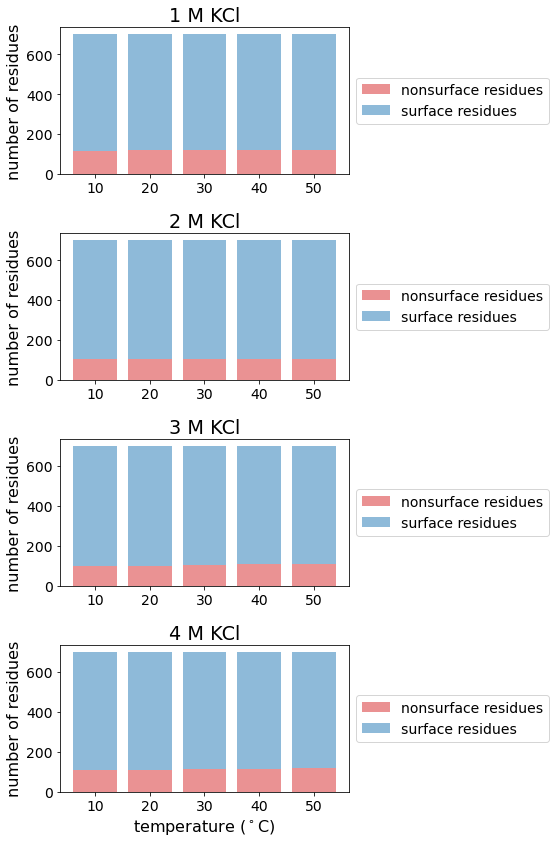

In [21]:
surface    = [number_of_surface_res_1M,number_of_surface_res_2M,number_of_surface_res_3M,number_of_surface_res_4M]
nonsurface = [number_of_nonsurface_res_1M,number_of_nonsurface_res_2M,number_of_nonsurface_res_3M,number_of_nonsurface_res_4M]
x = ["10","20","30","40","50"]
molarities=["1 M KCl","2 M KCl","3 M KCl","4 M KCl"]
    
fig, axs = plt.subplots(4, figsize=[8,12])
plt.rcParams['font.size'] = '16'
for i in range(4):
    y1 = nonsurface[i]
    y2 = surface[i]
    axs[i].bar(x, y1, alpha = 0.5,  color = "C3", label="nonsurface residues")
    axs[i].bar(x, y2, bottom=y1, alpha=0.5, color='C0', label="surface residues")
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    axs[i].tick_params(axis="both", labelsize=14)
    axs[i].set_ylabel("number of residues",fontsize=16)
    axs[i].set_title("%s"%molarities[i])
axs[3].set_xlabel("temperature ($^\circ$C)",fontsize=16)
fig.tight_layout()
fig.savefig("graphs/number_of_surface_nonsurface_residues_%dth_percentile.png"%percentile_value)